Databases and SQL for Data Science

This notebook showcases my ability to store a dataset into a database and analyze data using SQL and Python. Skills demonstrated in this notebook include:

(1) Utilizing open source data on food access in Atlanta
(2) Storing data in an Db2 database on IBM Cloud instance
(3) Utilizing SQL skills to solve problems



In [1]:
%load_ext sql

In [2]:
#establishes connection string for Db2 on Cloud database instance

%sql ibm_db_sa://qpk29216:lk19td%5Elk6cl0x88@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB

'Connected: qpk29216@BLUDB'

In [5]:
import pandas as pd
import os

crime_data = pd.read_csv('/resources/data/crime.csv')
%sql PERSIST crime_data

 * ibm_db_sa://qpk29216:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB


'Persisted crime_data'

In [6]:
%sql SELECT * FROM crime_data limit 5;

 * ibm_db_sa://qpk29216:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


index,Report Number,Report Date,Occur Date,Occur Time,Possible Date,Possible Time,Beat,Apartment Office Prefix,Apartment Number,Location,Shift Occurrence,Location Type,UCR Literal,UCR #,IBR Code,Neighborhood,npu,Latitude,Longitude
0,190011357,1/1/2019,1/1/2019,100,1/1/2019,1205,301.0,None,None,746 LEXINGTON AVE SW,Day Watch,13,LARCENY-FROM VEHICLE,640,2305,1.0,V,33.72443,-84.41221999999999
1,190021804,1/2/2019,1/2/2019,2100,1/2/2019,2117,303.0,None,None,634 WHITEHALL ST SW,Morning Watch,23,LARCENY-FROM VEHICLE,640,2305,1.0,V,33.74179,-84.40844
2,190041233,1/4/2019,1/4/2019,1334,1/4/2019,1340,301.0,None,None,701 BROOKLINE ST SW,Evening Watch,20,LARCENY-NON VEHICLE,690,2399,1.0,V,33.72722,-84.41029
3,190050828,1/5/2019,1/5/2019,1030,1/5/2019,1115,301.0,None,None,944 MURPHY AVE SW,Day Watch,18,LARCENY-FROM VEHICLE,640,2305,1.0,V,33.72922,-84.41524
4,190061567,1/6/2019,1/6/2019,1940,1/6/2019,1949,303.0,None,None,634 WHITEHALL ST SW,Evening Watch,23,AUTO THEFT,710,2404,1.0,V,33.74192,-84.40871


In [9]:
%sql SELECT "Neighborhood", count(*) as crime_sum from crime_data \
GROUP BY "Neighborhood" \
ORDER BY crime_sum desc nulls last limit 11

 

 * ibm_db_sa://qpk29216:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


Neighborhood,crime_sum
68.0,262
124.0,218
None,126
117.0,82
184.0,79
132.0,76
115.0,74
180.0,73
128.0,68
99.0,58


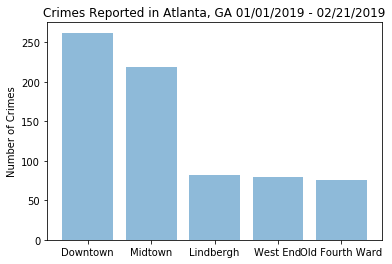

In [15]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
%matplotlib inline
 
objects = ('Downtown', 'Midtown', 'Lindbergh', 'West End', 'Old Fourth Ward') 
y_pos = np.arange(len(objects))
crimes = [262,218,82,79,76] 
 
plt.bar(y_pos, crimes, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Crimes')
plt.title('Crimes Reported in Atlanta, GA 01/01/2019 - 02/21/2019')

 
plt.show()

In [41]:
#atlanta_crime_data.head()
crime_data.dtypes


Report Number                int64
Report Date                 object
Occur Date                  object
Occur Time                  object
Possible Date               object
Possible Time                int64
Beat                       float64
Apartment Office Prefix     object
Apartment Number            object
Location                    object
Shift Occurrence            object
Location Type               object
UCR Literal                 object
UCR #                        int64
IBR Code                    object
Neighborhood               float64
NPU                         object
Latitude                   float64
Longitude                  float64
dtype: object

In [37]:
%sql SELECT "Possible Time", count(*) as time_sum from atlanta_crime_data \
GROUP BY "Possible Time" \
ORDER BY time_sum desc nulls last limit 11

 * ibm_db_sa://qpk29216:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


Possible Time,time_sum
800,61
2200,56
900,54
1200,52
1400,48
1100,46
1300,45
1500,44
700,43
2000,41


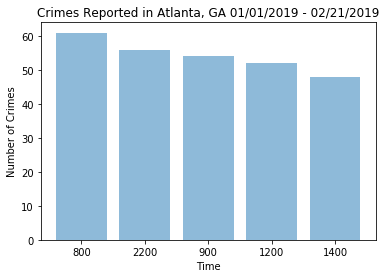

In [44]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
%matplotlib inline
 
objects = ('800', '2200', '900', '1200', '1400') 
y_pos = np.arange(len(objects))
crimes = [61,56,54,52,48] 
 
plt.bar(y_pos, crimes, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Crimes')
plt.xlabel('Time')
plt.title('Crimes Reported in Atlanta, GA 01/01/2019 - 02/21/2019')

 
plt.show()

In [40]:
%sql SELECT "Possible Time", count(*) as time_sum from crime_data \
GROUP BY "Possible Time" \
ORDER BY time_sum asc nulls last limit 11

 * ibm_db_sa://qpk29216:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


Possible Time,time_sum
4,1
33,1
29,1
28,1
26,1
24,1
21,1
16,1
12,1
11,1


In [53]:
%sql select "UCR Literal" from crime_data 

 * ibm_db_sa://qpk29216:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


UCR Literal
LARCENY-FROM VEHICLE
LARCENY-FROM VEHICLE
LARCENY-NON VEHICLE
LARCENY-FROM VEHICLE
AUTO THEFT
BURGLARY-NONRES
LARCENY-NON VEHICLE
LARCENY-FROM VEHICLE
AUTO THEFT
LARCENY-FROM VEHICLE


In [54]:
%sql select count(*) from crime_data where "UCR Literal" = 'AGG ASSAULT'

 * ibm_db_sa://qpk29216:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


1
210


In [55]:
%sql select count(*) from crime_data where "UCR Literal" = 'AUTO THEFT'

 * ibm_db_sa://qpk29216:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


1
461


In [56]:
%sql select count(*) from crime_data where "UCR Literal" = 'BURGLARY-NONRES'

 * ibm_db_sa://qpk29216:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


1
101


In [57]:
%sql select count(*) from crime_data where "UCR Literal" = 'BURGLARY-RESIDENCE'

 * ibm_db_sa://qpk29216:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


1
307


In [58]:
%sql select count(*) from crime_data where "UCR Literal" = 'HOMICIDE'

 * ibm_db_sa://qpk29216:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


1
14


In [59]:
%sql select count(*) from crime_data where "UCR Literal" = 'LARCENY-FROM VEHICLE'

 * ibm_db_sa://qpk29216:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


1
1269


In [60]:
%sql select count(*) from crime_data where "UCR Literal" = 'LARCENY-NON VEHICLE'

 * ibm_db_sa://qpk29216:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


1
799


In [61]:
%sql select count(*) from crime_data where "UCR Literal" = 'ROBBERY-COMMERCIAL'

 * ibm_db_sa://qpk29216:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


1
22


In [62]:
%sql select count(*) from crime_data where "UCR Literal" = 'ROBBERY-PEDESTRIAN'

 * ibm_db_sa://qpk29216:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


1
104


In [63]:
%sql select count(*) from crime_data where "UCR Literal" = 'ROBBERY-RESIDENCE'

 * ibm_db_sa://qpk29216:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


1
16


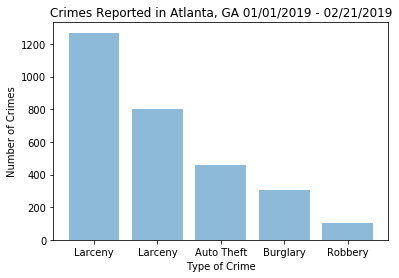

In [68]:
objects = ('Larceny', 'Auto Theft', 'Burglary', 'Robbery') 
y_pos = np.arange(len(objects))
crimes = [2068,461,408,210,120, ] 
 
plt.bar(y_pos, crimes, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Crimes')
plt.xlabel('Type of Crime')
plt.title('Crimes Reported in Atlanta, GA 01/01/2019 - 02/21/2019')

 
plt.show()

#low homicide and manslaughter least frequent